**Problem - 1: Perform a classification task with knn from scratch.**

**1. Load the Dataset:

In [89]:
import pandas as pd
df = pd.read_csv(r'/content/diabetes.csv')


In [77]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [78]:
rows, columns = df.shape
print(f"Rows: {rows}, Columns: {columns}")

Rows: 768, Columns: 9


In [79]:
data_types = df.dtypes
print(data_types)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [80]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [81]:
missing_values = (df.isnull().sum()/len(df))*100
print("Missing values count for each column is as follows:")
print(missing_values )

Missing values count for each column is as follows:
Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64


2. Handle Missing Data:

    • Handle any missing values appropriately, either by dropping or imputing them based on the data.

 - **No missing values found**

**3. Feature Engineering:**

    • Separate the feature matrix (X) and target variable (y).

In [82]:
import numpy as np

X = df.drop(columns=["Outcome"]).values # Convert features to NumPy array
y = df["Outcome"].values # Convert target to NumPy array

• Perform a train - test split from scratch using a 70% − 30% ratio.

In [92]:
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):

    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices) # Shuffle the indices
    test_split_size = int(len(X) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)
# Output shapes to verify
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (538, 8)
Shape of X_test: (230, 8)
Shape of y_train: (538,)
Shape of y_test: (230,)


**4. Implement KNN:**

• Compute distances using Euclidean distance.

In [84]:
def euclidean_distance(point1, point2):
    """
    Calculate the Euclidean distance between two points in n-dimensional space.
    Arguments:
    point1 : np.ndarray
    The first point as a numpy array.
    point2 : np.ndarray
    The second point as a numpy array.
    Returns:
    float
    The Euclidean distance between the two points.
    Raises:
    ValueError: If the input points do not have the same dimensionality.
    """
    # Check if the points are of the same dimension
    if point1.shape != point2.shape:
        raise ValueError("Points must have the same dimensions to calculate Euclidean distance.")
    # Calculate the Euclidean distance
    distance = np.sqrt(np.sum((point1 - point2) ** 2))
    return distance


• Write functions for:



In [85]:
def knn_predict_single(query, X_train, y_train, k=3):
    """
    Predict the class label for a single query using the K-nearest neighbors algorithm.
    Arguments:
    query : np.ndarray
    The query point for which the prediction is to be made.
    X_train : np.ndarray
    The training feature matrix.
    y_train : np.ndarray
    The training labels.
    k : int, optional
    The number of nearest neighbors to consider (default is 3).
    Returns:
    int
    The predicted class label for the query.
    """
    distances = [euclidean_distance(query, train_point) for train_point in X_train]
    sorted_indices = np.argsort(distances)
    nearest_indices = sorted_indices[:k]
    nearest_labels = y_train[nearest_indices]
    prediction = np.bincount(nearest_labels).argmax()
    return prediction


– Predicting classes for all test samples.

In [86]:
def knn_predict(X_test, X_train, y_train, k=3):
    """
    Predict the class labels for all test samples using the K-nearest neighbors algorithm.
    Arguments:
    X_test : np.ndarray
    The test feature matrix.
    X_train : np.ndarray
    The training feature matrix.
    y_train : np.ndarray
    The training labels.
    k : int, optional
    The number of nearest neighbors to consider (default is 3).
    Returns:
    np.ndarray
    An array of predicted class labels for the test samples.
    """
    predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
    return np.array(predictions)

X_test_sample = X_test[:230] # Taking a small subset for testing
y_test_sample = y_test[:230] # Corresponding labels for the subset
predictions = knn_predict(X_test_sample, X_train, y_train)
print("Predictions:", predictions)
assert predictions.shape == y_test_sample.shape, "The shape of predictions does not match the shape of the actual labels."
print("Test case passed successfully!")


Predictions: [0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1
 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0
 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0
 0 0 0 1 0 0 0 0]
Test case passed successfully!


• Evaluate the performance using accuracy

In [87]:
# Function to compute accuracy of predictions
def compute_accuracy(y_true, y_pred):
    """
    Compute the accuracy of predictions.
    Arguments:
    y_true : np.ndarray ; The true labels.
    y_pred : np.ndarray; The predicted labels.
    Returns:
    float : The accuracy as a percentage (0 to 100).
    """
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy

try:
    accuracy = compute_accuracy(y_test, predictions)
    print(f"Accuracy of the KNN model on the test set: {accuracy:.2f}%")
except Exception as e:
    print(f"An unexpected error occurred during prediction or accuracy computation: {e}")

Accuracy of the KNN model on the test set: 67.39%


**Problem - 2 - Experimentation:**

    1. Repeat the Classification Task:

• Scale the Feature matrix X.

In [88]:
def standard_scaling(col):
    mean = col.mean()
    std_dev = col.std()
    standardized_col = (col - mean) / std_dev
    return standardized_col
X_scaled = standard_scaling(X_train)
y_scaled = standard_scaling(y_train)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split_scratch(X, y, test_size=0.3)
print("Shape of X_train_scale:", X_train_scaled.shape)
print("Shape of X_test_scale:", X_test_scaled.shape)
print("Shape of y_train_scale:", y_train_scaled.shape)
print("Shape of y_test_scaled:", y_test_scaled.shape)
X_test_scaled_sample = X_test_scaled[:230]
y_test_scaled_sample = y_test_scaled[:230]
X_test_scaled_sample = X_test_scaled_sample.astype(np.int64)
predictions_scaled = knn_predict(X_test_scaled_sample, X_train_scaled, y_train_scaled)
print("Predictions:", predictions_scaled)
assert predictions_scaled.shape == y_test_scaled_sample.shape, "The shape of predictions does not match the shape of the actual labels."
print("Test case passed successfully!")
try:
    accuracy_scaled = compute_accuracy(y_test_scaled, predictions_scaled)
    print(f"Accuracy of the KNN model on the test set: {accuracy_scaled:.2f}%")
except Exception as e:
    print(f"An unexpected error occurred during prediction or accuracy computation: {e}")

Shape of X_train_scale: (538, 8)
Shape of X_test_scale: (230, 8)
Shape of y_train_scale: (538,)
Shape of y_test_scaled: (230,)
Predictions: [0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1
 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0
 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0
 0 0 0 1 0 0 0 0]
Test case passed successfully!
Accuracy of the KNN model on the test set: 67.83%


**Problem - 3 -

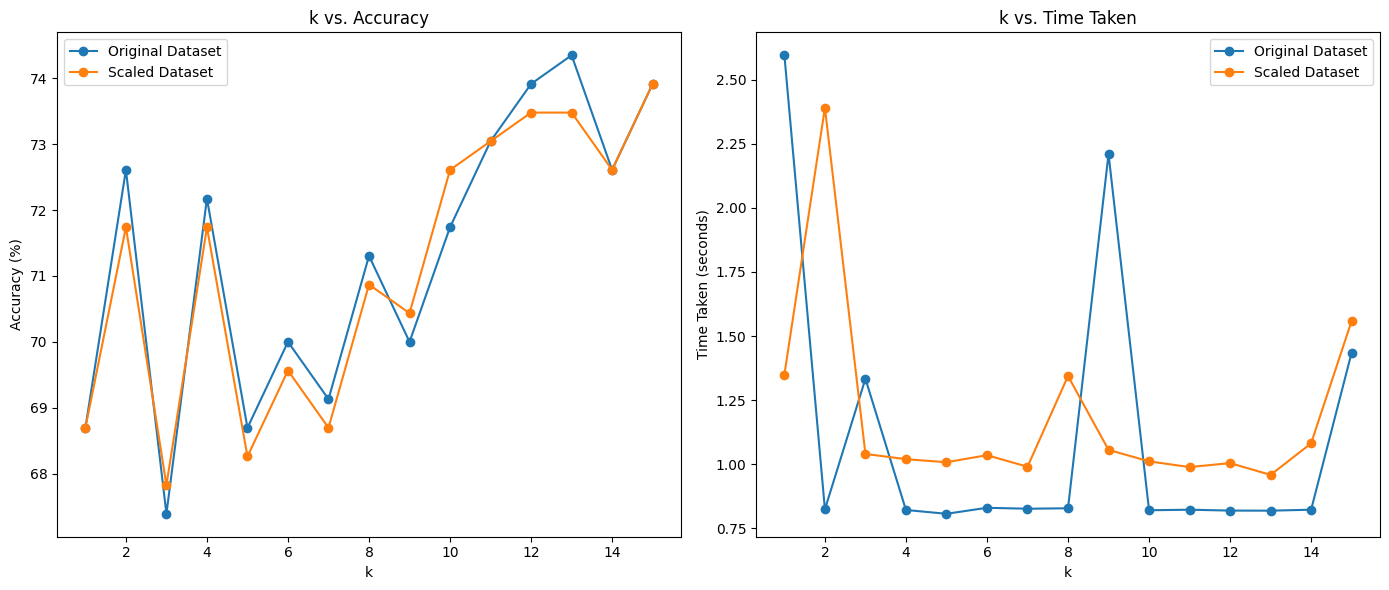

Optimal k for original dataset: 13
Optimal k for scaled dataset: 15


In [75]:
import time
import matplotlib.pyplot as plt

# Define k values
k_values = range(1, 16)

# Initialize lists to store results
accuracies_original = []
times_original = []
accuracies_scaled = []
times_scaled = []

# Function to calculate accuracy and time for similarity check
def calculate_similarity_and_time(X_test_sample, X_train, y_train, k):
    start_time = time.time()
    predictions = knn_predict(X_test_sample, X_train, y_train, k)  # Use similarity-based predictions
    end_time = time.time()
    accuracy = compute_accuracy(y_test_sample, predictions)  # Compare predictions for accuracy
    time_taken = end_time - start_time
    return accuracy, time_taken

# Loop over k values
for k in k_values:
    # Original dataset
    accuracy, time_taken = calculate_similarity_and_time(X_test_sample, X_train, y_train, k)
    accuracies_original.append(accuracy)
    times_original.append(time_taken)

    # Scaled dataset
    accuracy_scaled, time_taken_scaled = calculate_similarity_and_time(X_test_scaled_sample, X_train_scaled, y_train_scaled, k)
    accuracies_scaled.append(accuracy_scaled)
    times_scaled.append(time_taken_scaled)

# Plotting results
plt.figure(figsize=(14, 6))

# Accuracy vs. k
plt.subplot(1, 2, 1)
plt.plot(k_values, accuracies_original, label='Original Dataset', marker='o')
plt.plot(k_values, accuracies_scaled, label='Scaled Dataset', marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy (%)')
plt.title('k vs. Accuracy')
plt.legend()

# Time vs. k
plt.subplot(1, 2, 2)
plt.plot(k_values, times_original, label='Original Dataset', marker='o')
plt.plot(k_values, times_scaled, label='Scaled Dataset', marker='o')
plt.xlabel('k')
plt.ylabel('Time Taken (seconds)')
plt.title('k vs. Time Taken')
plt.legend()

plt.tight_layout()
plt.show()

# Print optimal k values
optimal_k_original = k_values[np.argmax(accuracies_original)]
optimal_k_scaled = k_values[np.argmax(accuracies_scaled)]

print(f"Optimal k for original dataset: {optimal_k_original}")
print(f"Optimal k for scaled dataset: {optimal_k_scaled}")
